<a href="https://colab.research.google.com/github/fafavio/evas-o_funcionarios_analise_python_ETL/blob/main/evasao_funcionarios_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# `📌 Extracão`
---



In [1]:
#extraindo url e armazenando em uma variável
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

df_evasao = pd.read_json(url)

In [2]:
#mostrando como ficou após a importação
df_evasao.head(10)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
# salvando as colunas já normalizadas em outro dataframe

df_colunas_prontas = df_evasao[['customerID','Churn']]


In [4]:
df_colunas_prontas.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [5]:
from pandas import json_normalize
#normalizando cada coluna
df_customer = json_normalize(df_evasao['customer'])
df_phone = json_normalize(df_evasao['phone'])
df_internet = json_normalize(df_evasao['internet'])
df_account = json_normalize(df_evasao['account'])

# concatenar as novas colunas
df_normalizado = pd.concat([ df_customer, df_phone, df_internet, df_account], axis=1)

In [6]:
df_normalizado.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
df_final= pd.concat([df_colunas_prontas,df_normalizado] , axis=1)

In [8]:
# mostrando o df_final
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
#salvando o df_final em um arquivo

df_final.to_csv('df_final' , sep = ';', index = False)



# 🔧 Transformação

In [10]:
# Verificando os tipos de dados

df_oficial = pd.read_csv('df_final' , sep = ';')

df_oficial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
# verificando o número de linhas e colunas

df_oficial.shape




(7267, 21)

In [12]:
#como tem muitas colunas vou verificar o nome de todas por aqui

df_oficial.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [13]:
# quantos clientes sairam

df_oficial['Churn'].value_counts()



,count
Churn,
No,5174
Yes,1869


Verificando as colunas necessárias para a análise:

In [14]:
#é importante verificar as colunas que mais se alinham com a necessidade do porque cancelaram:se foi pelo tempo  (tenure, Contract ), se foi por tipos de assinaturas ou quantidade(PhoneServie, Multiplelines, InternetService, StreamingMovies), se foi por conta do valor pago estava caro (Charges.Monthly e Charges.Total)

#se caso for pelo tempo : tenure

df_oficial['tenure'].value_counts()

,count
tenure,
1,634
72,369
2,246
3,207
4,185
...,...
28,60
39,59
44,54


In [15]:
#verificar numeros unicos para quantidade de meses
df_oficial.tenure.unique()


array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [16]:
# se for pelo tempo: Contract - contagem de linhas

df_oficial['Contract'].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [17]:
# se for pelo tempo: Contract - relação com Churn

df_oficial.groupby('Churn')['Contract'].value_counts()

#aqui ja percebe-se que quem fazmonth_to_month tem mais chances de cancelar

Churn  Contract      
No     Month-to-month    2220
       Two year          1647
       One year          1307
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: count, dtype: int64

In [18]:
#se for por conta de valores altos: Charges.Monthly

#vamos fazer uma média para ter uma ideia de a partir de qual valor mensal a pessoa tende a cancelar

df_oficial.groupby('Churn')['Charges.Monthly'].mean()



,Charges.Monthly
Churn,
No,61.265124
Yes,74.441332


In [19]:
#se for por conta de valores altos: Charges.Monthly
#verificando a quantidade de sim e não de churn por Charges.Monthly

df_oficial.groupby('Churn')['Charges.Monthly'].size()

,Charges.Monthly
Churn,
No,5174
Yes,1869


In [20]:
#se for por conta de valores altos: Charges.Total
#primeiro precisa passar para o tipo float

df_oficial['Charges.Total'] =pd.to_numeric(df_oficial['Charges.Total'], errors = 'coerce')


#fazendo a media agora

df_oficial.groupby('Churn')['Charges.Total'].mean()

,Charges.Total
Churn,
No,2555.344141
Yes,1531.796094


In [21]:
#se for por conta de assinaturas: PhoneService

df_oficial['PhoneService'].value_counts()


,count
PhoneService,
Yes,6560
No,707


In [22]:
#se for por conta de assinaturas: PhoneService
# relacionando com o Churn

df_oficial.groupby('Churn')['PhoneService'].value_counts()

Churn  PhoneService
No     Yes             4662
       No               512
Yes    Yes             1699
       No               170
Name: count, dtype: int64

In [23]:
#se for por conta de assinaturas: Multiplelines

df_oficial.groupby('Churn')['MultipleLines'].value_counts()

Churn  MultipleLines   
No     No                  2541
       Yes                 2121
       No phone service     512
Yes    Yes                  850
       No                   849
       No phone service     170
Name: count, dtype: int64

In [24]:
#se for por conta de assinaturas: InternetService

df_oficial.groupby('Churn')['InternetService'].value_counts()


Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: count, dtype: int64

In [25]:
#se for por conta de assinaturas: OnlineSecurity

df_oficial.groupby('Churn')['OnlineSecurity'].value_counts()

Churn  OnlineSecurity     
No     No                     2037
       Yes                    1724
       No internet service    1413
Yes    No                     1461
       Yes                     295
       No internet service     113
Name: count, dtype: int64

In [26]:
#se for por conta de assinaturas: OnlineBackup

df_oficial.groupby('Churn')['OnlineBackup'].value_counts()

Churn  OnlineBackup       
No     Yes                    1906
       No                     1855
       No internet service    1413
Yes    No                     1233
       Yes                     523
       No internet service     113
Name: count, dtype: int64

In [27]:
#se for por conta de assinaturas: DeviceProtection

df_oficial.groupby('Churn')['DeviceProtection'].value_counts()


Churn  DeviceProtection   
No     No                     1884
       Yes                    1877
       No internet service    1413
Yes    No                     1211
       Yes                     545
       No internet service     113
Name: count, dtype: int64

In [28]:
#se for por conta de assinaturas: TechSupport

df_oficial.groupby('Churn')['TechSupport'].value_counts()

Churn  TechSupport        
No     No                     2027
       Yes                    1734
       No internet service    1413
Yes    No                     1446
       Yes                     310
       No internet service     113
Name: count, dtype: int64

In [29]:
#se for por conta de assinaturas: StreamingTV

df_oficial.groupby('Churn')['StreamingTV'].value_counts()

Churn  StreamingTV        
No     Yes                    1893
       No                     1868
       No internet service    1413
Yes    No                      942
       Yes                     814
       No internet service     113
Name: count, dtype: int64

In [30]:
#se for por conta de assinaturas: StreamingMovies

df_oficial.groupby('Churn')['StreamingMovies'].value_counts()

Churn  StreamingMovies    
No     Yes                    1914
       No                     1847
       No internet service    1413
Yes    No                      938
       Yes                     818
       No internet service     113
Name: count, dtype: int64

Verificação de inconsistencias no dataframe:

In [31]:
# verificando se tem valores nulos
df_oficial.isnull().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [32]:
# vamos excluir as linhas da coluna principal Churn com valores nulos pois não possuem utilidade e também da coluna Charges.Total
df_oficial.dropna(subset=['Churn'] , inplace = True)
df_oficial.dropna(subset=['Charges.Total'] , inplace = True)

In [33]:
# verificando se tem valores nulos novamente
df_oficial.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [34]:
#verificando valores zerados no Charges.Monthly
df_oficial[df_oficial['Charges.Monthly']==0]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [35]:
#verificação de valores duplicados
df_oficial.duplicated().sum()

np.int64(0)

In [36]:
# Aplicar lstrip() somente nas colunas de texto para remover espaços
for col in df_oficial.select_dtypes(include='object').columns:
    df_oficial[col] = df_oficial[col].str.lstrip()



In [37]:
df_oficial.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [38]:
# verificando inconsistencias em colunas categóricas para a análise

#salvando em uma variavel lista para verificar todas de uma vez

colunas_categoricas = ['Churn','PhoneService', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','Contract']

#vendo as inconsistencias

contagens = df_oficial[colunas_categoricas].apply(lambda x: x.value_counts(dropna=False))



In [39]:
contagens

,Churn,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
DSL,NaN,NaN,NaN,2416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiber optic,NaN,NaN,NaN,3096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month-to-month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875.0
No,5163.0,680.0,3385.0,1520.0,3497.0,3087.0,3094.0,3472.0,2809.0,2781.0,NaN
No internet service,NaN,NaN,NaN,NaN,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,NaN
No phone service,NaN,NaN,680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
One year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1472.0
Two year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1685.0
Yes,1869.0,6352.0,2967.0,NaN,2015.0,2425.0,2418.0,2040.0,2703.0,2731.0,NaN


In [40]:
# Ver todas as categorias únicas de cada coluna
for coluna in colunas_categoricas:
    print(f"Coluna: {coluna}")
    print(df_oficial[coluna].unique())  # mostra todas as categorias
    print("----------------------")

Coluna: Churn
['No' 'Yes']
----------------------
Coluna: PhoneService
['Yes' 'No']
----------------------
Coluna: MultipleLines
['No' 'Yes' 'No phone service']
----------------------
Coluna: InternetService
['DSL' 'Fiber optic' 'No']
----------------------
Coluna: OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------
Coluna: OnlineBackup
['Yes' 'No' 'No internet service']
----------------------
Coluna: DeviceProtection
['No' 'Yes' 'No internet service']
----------------------
Coluna: TechSupport
['Yes' 'No' 'No internet service']
----------------------
Coluna: StreamingTV
['Yes' 'No' 'No internet service']
----------------------
Coluna: StreamingMovies
['No' 'Yes' 'No internet service']
----------------------
Coluna: Contract
['One year' 'Month-to-month' 'Two year']
----------------------


In [41]:
#transformar tudo em minúsculo ajuda a reduzir inconsistencias


df_oficial = df_oficial.applymap(lambda x: x.lower() if isinstance(x, str) else x)



/tmp/ipython-input-1289013319.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_oficial = df_oficial.applymap(lambda x: x.lower() if isinstance(x, str) else x)


Criando a coluna de Contas Diarias

In [42]:
# criando a coluna baseando em que todo mes teria 30 dias
df_oficial['Contas_Diarias'] = df_oficial['Charges.Monthly'] / 30

#deixando apenas duas casas decimais de forma mais padronizada
df_oficial['Contas_Diarias'] = df_oficial['Contas_Diarias'].round(2)  # 2 casas decimais

df_oficial.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.19
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,2.00
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.46
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.27
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.80


In [43]:
#salvando o dataframe em CSV com as necessidades tratadas

df_oficial.to_csv('df_evasao_tratado.csv', sep=';', index=False, encoding='utf-8-sig')

# 📊 Carga e análise

Análise Descritiva

In [44]:
df_evasao_tratado = pd.read_csv('df_evasao_tratado.csv', sep= ';')

In [45]:
df_evasao_tratado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.19
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,2.00
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.46
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.27
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.84
7028,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.84
7029,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.68
7030,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.26


In [46]:
# Fazendo media para colunas numéricas que estariam em análise usando o Contas_Diarias, Charges.Monthly e Charges.Total
df_media = df_evasao_tratado.groupby('Churn')[['Charges.Total', 'Charges.Monthly','Contas_Diarias']].mean().round(2)
df_media
# percebe-se que os preços diariamente são bem parecidos, talvez não fosse o valor que estaria sendo o motivo de evasão de clientes, talvez seja o contrato.

,Charges.Total,Charges.Monthly,Contas_Diarias
Churn,,,
no,2555.34,61.31,2.04
yes,1531.80,74.44,2.48


In [47]:
# Fazendo mediana para colunas numéricas que estariam em análise usando o Contas_Diarias, Charges.Monthly e Charges.Total

df_mediana = df_evasao_tratado.groupby('Churn')[['Charges.Total', 'Charges.Monthly','Contas_Diarias']].median().round(2)

df_mediana

,Charges.Total,Charges.Monthly,Contas_Diarias
Churn,,,
no,1683.60,64.45,2.15
yes,703.55,79.65,2.66


In [48]:
# Fazendo desvio padrão para colunas numéricas que estariam em análise usando o Contas_Diarias, Charges.Monthly e Charges.Total
df_desvio_padrao = df_evasao_tratado.groupby('Churn')[['Charges.Total', 'Charges.Monthly','Contas_Diarias']].std().round(2)
df_desvio_padrao


,Charges.Total,Charges.Monthly,Contas_Diarias
Churn,,,
no,2329.46,31.09,1.04
yes,1890.82,24.67,0.82


Distribuição da evasão:

In [51]:
# nesse caso é excelente a entrada da coluna tenure (tempo por mês) na análise de evasão para a criação de gráficos : media

df_media_tempo_permanecido = df_evasao_tratado.groupby('Churn')['tenure'].mean().round(2)
df_media_tempo_permanecido

,tenure
Churn,
no,37.65
yes,17.98


In [74]:

# nesse caso é excelente a entrada da coluna tenure (tempo por mês) na análise de evasão para a criação de gráficos

df_tempo_permanecido = df_evasao_tratado.groupby('Churn')['tenure'].value_counts().sort_values(ascending= False)
df_tempo_permanecido


Churn  tenure
yes    1         380
no     72        356
       1         233
       71        164
yes    2         123
                ... 
       71          6
       72          6
       62          5
       63          4
       64          4
Name: count, Length: 144, dtype: int64

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

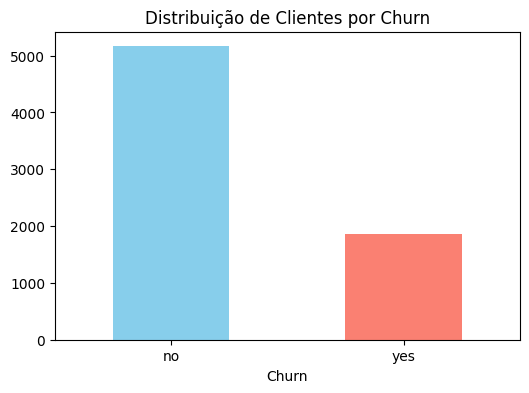

In [53]:
import matplotlib.pyplot as plt

# Criando o gráfico
# Contagem
df_evasao_tratado['Churn'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'salmon'],
    figsize=(6,4),
    title='Distribuição de Clientes por Churn'
)
plt.xticks(rotation=0)

<Axes: title={'center': 'Proporção de Clientes por Churn'}, ylabel='proportion'>

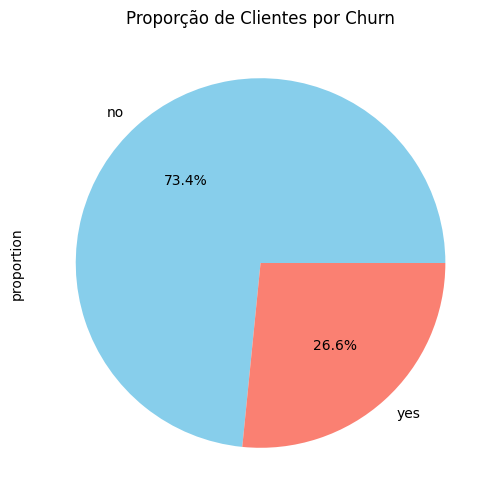

In [54]:
# gráfico par proporção
df_evasao_tratado['Churn'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon'],
    figsize=(6,6),
    title='Proporção de Clientes por Churn'
)


Contagem de Evasão por Variáveis Categóricas:

In [100]:
#evasão entre idosos e não idosos

df_idade_cancelaram = df_evasao_tratado[df_evasao_tratado['Churn'] == 'yes'] ["SeniorCitizen"].value_counts()
df_idade_cancelaram



,count
SeniorCitizen,
0,1393
1,476


<Axes: title={'center': 'Proporção de Cancelamentos entre idosos e não idosos'}, ylabel='count'>

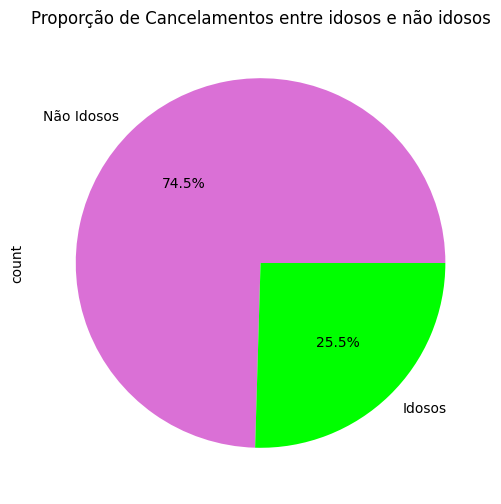

In [98]:
# gráfico par proporção
df_idade_cancelaram.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['orchid', 'lime'],
    figsize=(6,6),
    labels=['Não Idosos', 'Idosos'],
    title='Proporção de Cancelamentos entre idosos e não idosos'
)

In [101]:
# por idade mantidos

df_idade_mantidos = df_evasao_tratado[df_evasao_tratado['Churn'] == 'no'] ["SeniorCitizen"].value_counts()
df_idade_mantidos

,count
SeniorCitizen,
0,4497
1,666


<Axes: title={'center': 'Proporção de Cancelamentos entre idosos e não idosos'}, ylabel='count'>

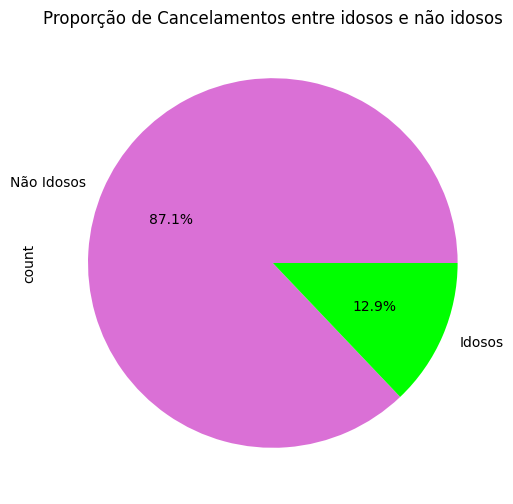

In [102]:
# gráfico par proporção
df_idade_mantidos.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['orchid', 'lime'],
    figsize=(6,6),
    labels=['Não Idosos', 'Idosos'],
    title='Proporção de Cancelamentos entre idosos e não idosos'
)

In [55]:
#erificando evasão por gênero
df_genero = df_evasao_tratado.groupby('Churn')['gender'].value_counts()
df_genero


Churn  gender
no     male      2619
       female    2544
yes    female     939
       male       930
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '(no, male)'),
  Text(1, 0, '(no, female)'),
  Text(2, 0, '(yes, female)'),
  Text(3, 0, '(yes, male)')])

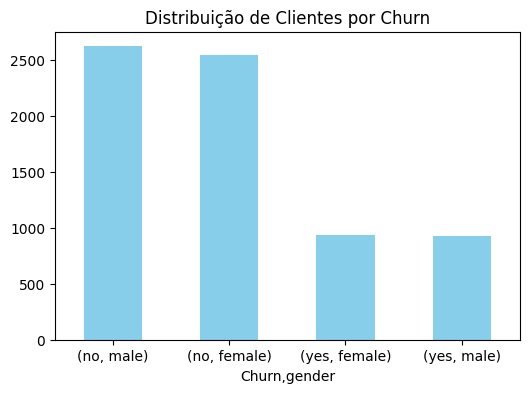

In [56]:
#gráfico de barras para melhor visualização

df_genero.plot(
    kind='bar',
    color='skyblue',
    figsize=(6,4),
    title='Distribuição de Clientes por Churn'
)
plt.xticks(rotation=0)

#mulheres costumam cancelar mais mas a diferença é mínima

In [57]:
#erificando evasão por tipo de contrato
df_contrato = df_evasao_tratado.groupby('Churn')['Contract'].value_counts()
df_contrato

Churn  Contract      
no     month-to-month    2220
       two year          1637
       one year          1306
yes    month-to-month    1655
       one year           166
       two year            48
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(no, month-to-month)'),
  Text(1, 0, '(no, two year)'),
  Text(2, 0, '(no, one year)'),
  Text(3, 0, '(yes, month-to-month)'),
  Text(4, 0, '(yes, one year)'),
  Text(5, 0, '(yes, two year)')])

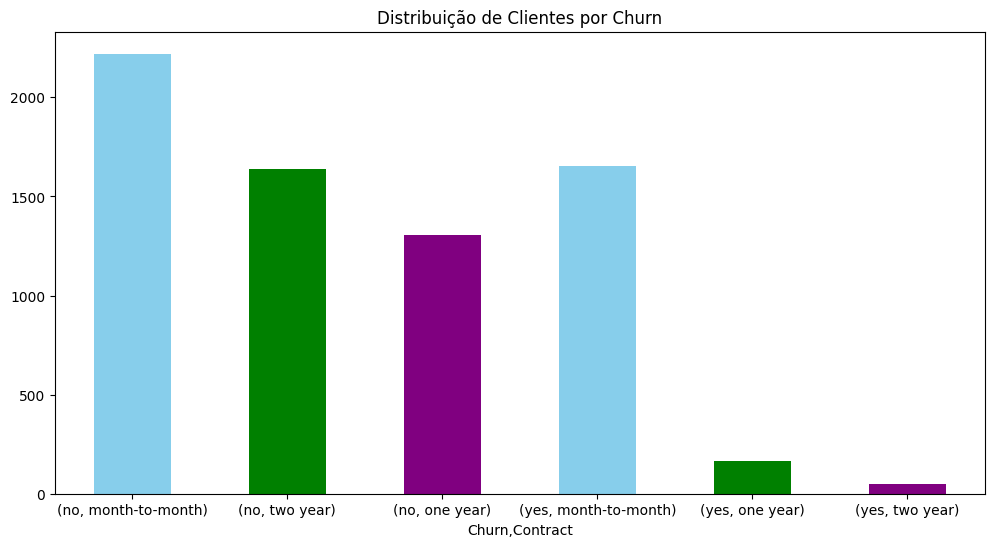

In [58]:
#gráfico de barras para melhor visualização

df_contrato.plot(
    kind='bar',
    color=['skyblue','green', 'purple'],
    figsize=(12,6),
    title='Distribuição de Clientes por Churn'
)
plt.xticks(rotation=0)
# quem faz contratos mensais fica absurdamente mais fáceis de cancelarem com a empresa

In [59]:
#erificando evasão por metodo de pagamento
df_metodo =df_evasao_tratado.groupby('Churn')['PaymentMethod'].value_counts()
df_metodo


Churn  PaymentMethod            
no     mailed check                 1296
       electronic check             1294
       credit card (automatic)      1289
       bank transfer (automatic)    1284
yes    electronic check             1071
       mailed check                  308
       bank transfer (automatic)     258
       credit card (automatic)       232
Name: count, dtype: int64

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400')])

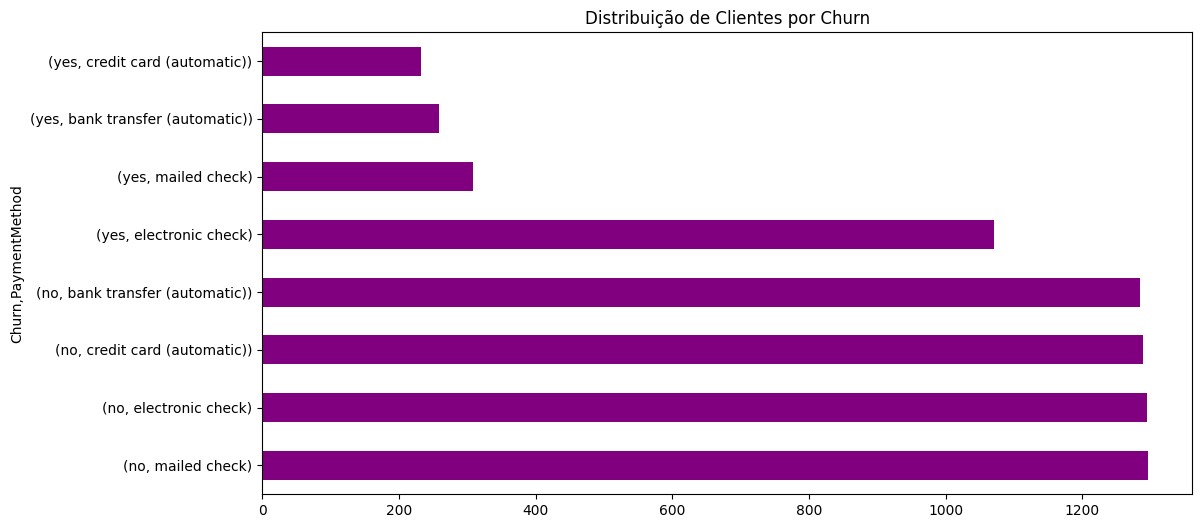

In [60]:
#gráfico de barras para melhor visualização

df_metodo.plot(
    kind='barh',
    color=('purple'),
    figsize=(12,6),
    title='Distribuição de Clientes por Churn'
)
plt.xticks(rotation=0)
# o metodo de pagamento eletronicheck pode sim influenciar alguem a cancelar uma assinatura

In [61]:
#verificando evasão por tipos de assinaturas , vamos separar análises somente para yes no Churn e depois para no:

#salvando todas as colunas em uma variável

colunas_assinaturas = ['PhoneService', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies']

#fazendo a contagem e separando bonitinho para construir o gráfico

#quem cancelou e não tinha o serviço

cancelamento_yes = df_evasao_tratado[df_evasao_tratado['Churn'] == 'yes'] [colunas_assinaturas].apply(lambda x: (x == 'no').sum())


cancelamento_yes



,0
PhoneService,170
MultipleLines,849
InternetService,113
OnlineSecurity,1461
OnlineBackup,1233
DeviceProtection,1211
TechSupport,1446
StreamingTV,942
StreamingMovies,938


<Axes: title={'center': 'Cancelamentos que não possuem o serviço'}>

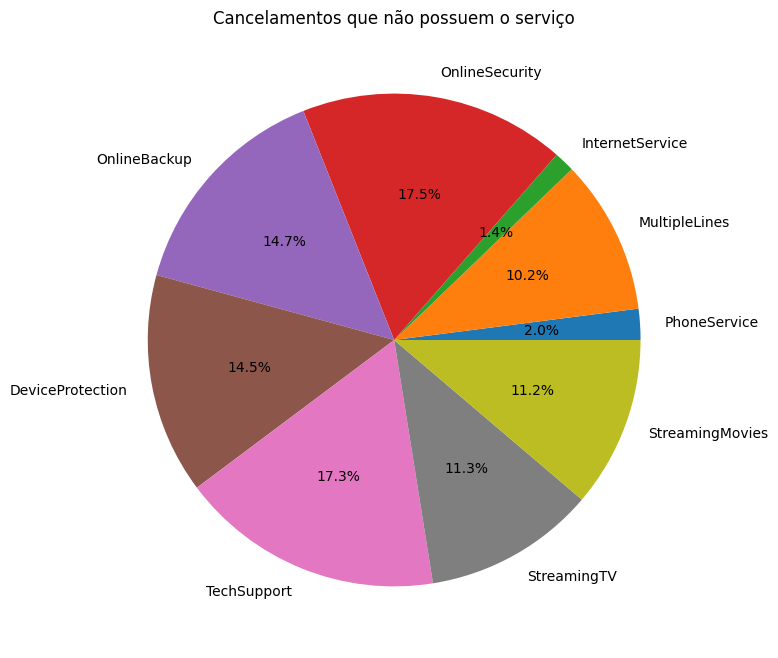

In [62]:
#criando o gráfico
cancelamento_yes.plot(
    kind='pie',
    figsize=(8,8),
    title='Cancelamentos que não possuem o serviço',
    autopct='%1.1f%%'
)

# quem não tinha suportes tecnicos e segurança online tendem a cancelar mais

In [105]:
#cancelaram por ter o serviço
cancelamento_yes_yes = df_evasao_tratado[df_evasao_tratado['Churn'] == 'yes'] [colunas_assinaturas].apply(lambda x: (x == 'yes').sum())


cancelamento_yes_yes

,0
PhoneService,1699
MultipleLines,850
InternetService,0
OnlineSecurity,295
OnlineBackup,523
DeviceProtection,545
TechSupport,310
StreamingTV,814
StreamingMovies,818


<Axes: title={'center': 'Cancelamentos que não possuem o serviço'}>

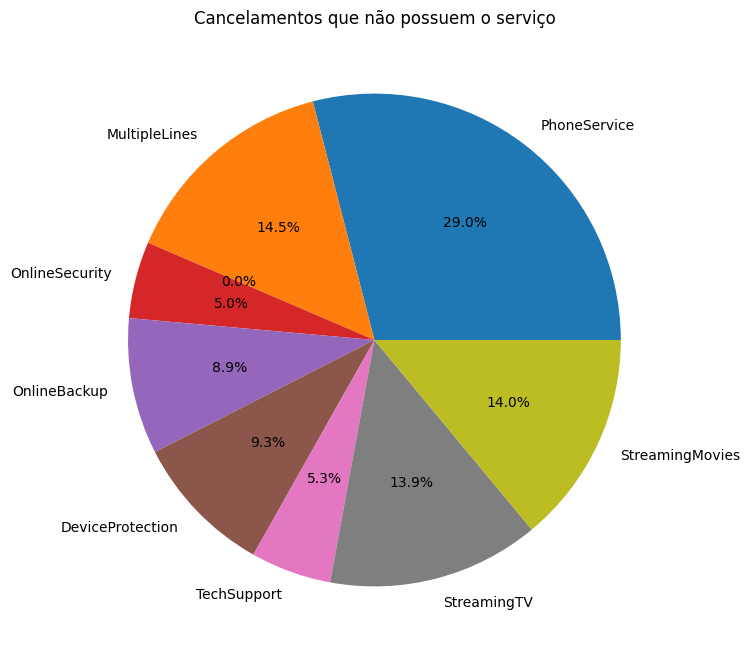

In [106]:
# grafico

#criando o gráfico
cancelamento_yes_yes.plot(
    kind='pie',
    figsize=(8,8),
    title='Cancelamentos que não possuem o serviço',
    autopct='%1.1f%%'
)
# quem tem serviço de telefone tende a cancelar mais

In [103]:
#fazendo para os que não cancelaram com serviço

cancelamento_no = df_evasao_tratado[df_evasao_tratado['Churn'] == 'no'] [colunas_assinaturas].apply(lambda x: (x == 'yes').sum())

<Axes: title={'center': 'Cancelamentos que não possuem o serviço'}>

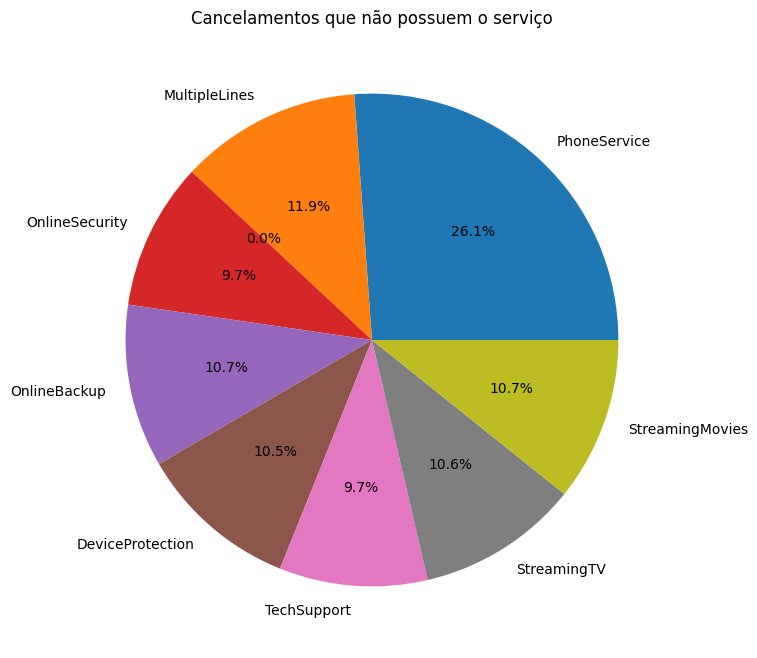

In [104]:
#criando o gráfico
cancelamento_no.plot(
    kind='pie',
    figsize=(8,8),
    title='Cancelamentos que não possuem o serviço',
    autopct='%1.1f%%'
)

# quem tem serviço de telefone tendem a ficar mais

In [108]:
# não cancelaram sem o serviço

cancelamento_no_no = df_evasao_tratado[df_evasao_tratado['Churn'] == 'no'] [colunas_assinaturas].apply(lambda x: (x == 'no').sum())
cancelamento_no_no

,0
PhoneService,510
MultipleLines,2536
InternetService,1407
OnlineSecurity,2036
OnlineBackup,1854
DeviceProtection,1883
TechSupport,2026
StreamingTV,1867
StreamingMovies,1843


<Axes: title={'center': 'Cancelamentos que não possuem o serviço'}>

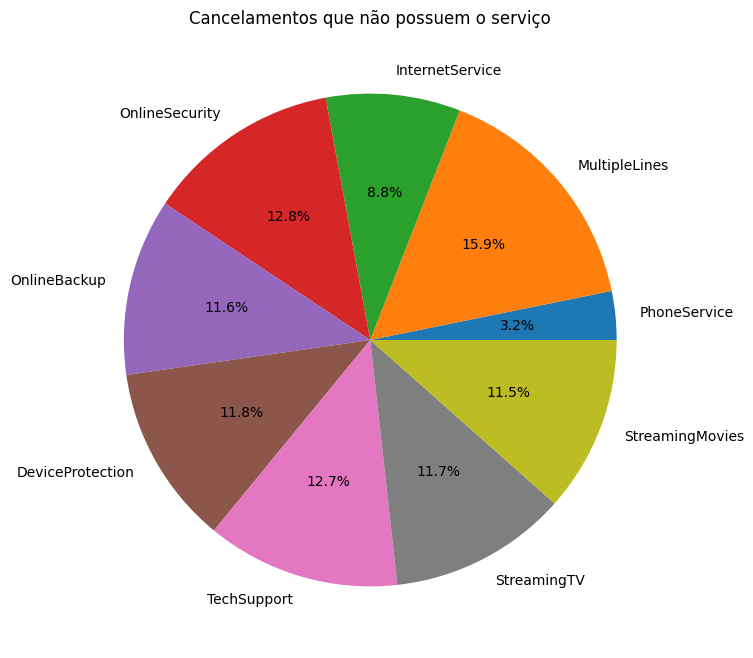

In [109]:
# gráfico

#criando o gráfico
cancelamento_no_no.plot(
    kind='pie',
    figsize=(8,8),
    title='Cancelamentos que não possuem o serviço',
    autopct='%1.1f%%'
)
# quem não tem multiplas linhas telefonicas tende a não cancelar

# Contagem de Evasão por Variáveis Numéricas:

In [65]:
#variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram.



cancelamento_tempo = df_evasao_tratado[df_evasao_tratado['Churn'] == 'yes'] ["tenure"].value_counts()
cancelamento_tempo

,count
tenure,
1,380
2,123
3,94
4,83
5,64
...,...
72,6
44,6
62,5


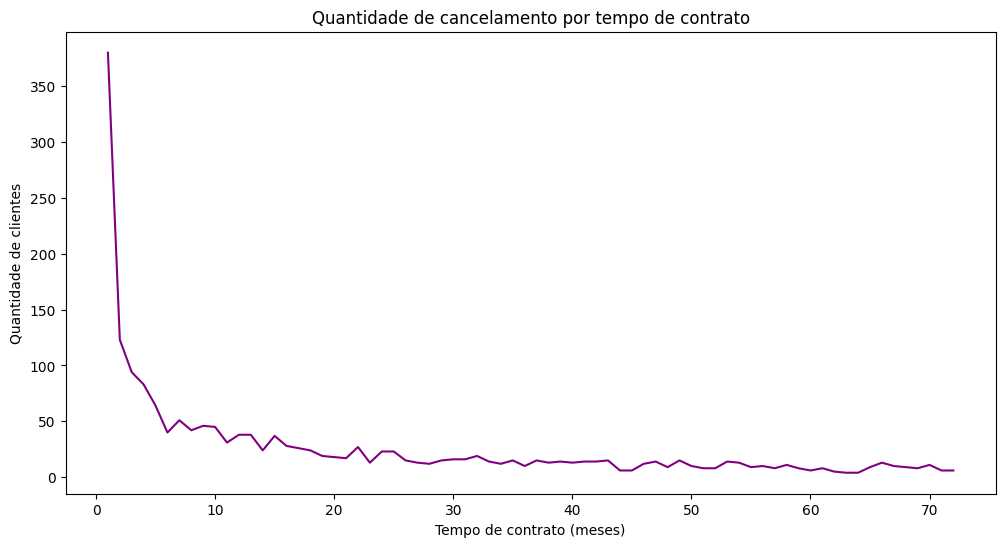

In [66]:
# Criando um gráfico de linhas para ver o tempo

#ordenar por tempo de contrato
cancelamento_tempo = cancelamento_tempo.sort_index()
# Plotando a linha
cancelamento_tempo.plot(
    kind='line',
    color='purple',
    figsize=(12,6),
    title='Quantidade de cancelamento por tempo de contrato'
)

plt.xlabel('Tempo de contrato (meses)')
plt.ylabel('Quantidade de clientes')
plt.xticks(rotation=0)
plt.show()

#ficou evidente que quanto menor o tempo de contrato maior a chance de cancelamento

In [67]:
#variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre clientes que não cancelaram e os que não cancelaram.



mantido_tempo = df_evasao_tratado[df_evasao_tratado['Churn'] == 'no'] ["tenure"].value_counts()
mantido_tempo

,count
tenure,
72,356
1,233
71,164
2,115
70,108
...,...
38,46
28,45
44,45


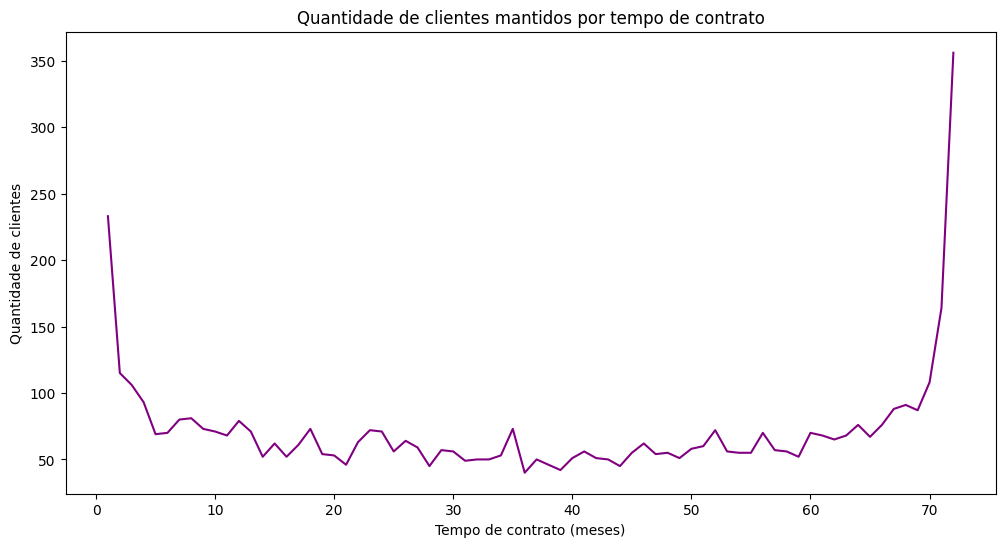

In [68]:
# Criando um gráfico de linhas para ver o tempo

#ordenar por tempo de contrato
mantido_tempo = mantido_tempo.sort_index()
# Plotando a linha
mantido_tempo.plot(
    kind='line',
    color='purple',
    figsize=(12,6),
    title='Quantidade de clientes mantidos por tempo de contrato'
)

plt.xlabel('Tempo de contrato (meses)')
plt.ylabel('Quantidade de clientes')
plt.xticks(rotation=0)
plt.show()
#aqui é notável que quem tem maior tempo de contrato tende a ser um cliente mais fiél

In [69]:
# Pega apenas clientes mantidos
mantido_pago = df_evasao_tratado[df_evasao_tratado['Churn'] == 'no']['Charges.Total']

mantido_pago

,Charges.Total
0,593.30
1,542.40
5,571.45
6,7904.25
7,5377.80
...,...
7024,633.45
7027,742.90
7029,92.75
7030,4627.65


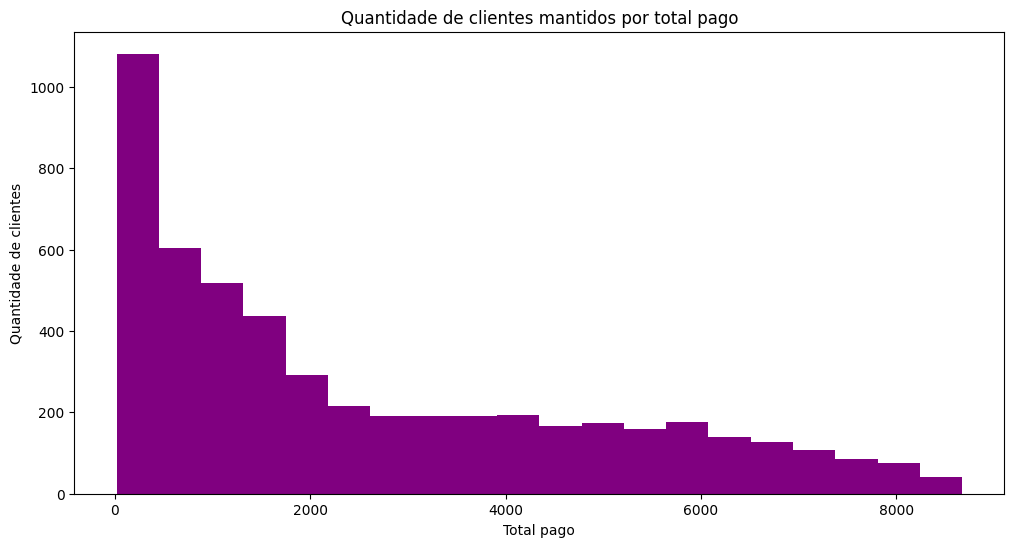

In [70]:
# Criando um gráfico de linhas para ver


import matplotlib.pyplot as plt

# Plotando o histograma e agrupando para facilitar a visão média
mantido_pago.plot(
    kind='hist',
    color='purple',
    bins=20,
    figsize=(12,6),
    title='Quantidade de clientes mantidos por total pago'
)

plt.xlabel('Total pago')
plt.ylabel('Quantidade de clientes')
plt.xticks(rotation=0)
plt.show()


In [71]:
# Pega apenas clientes mantidos
cancelamento_pago = df_evasao_tratado[df_evasao_tratado['Churn'] == 'yes']['Charges.Total']

cancelamento_pago

,Charges.Total
2,280.85
3,1237.85
4,267.40
18,2791.50
19,25.10
...,...
7009,2030.30
7012,790.15
7025,70.15
7026,85.50


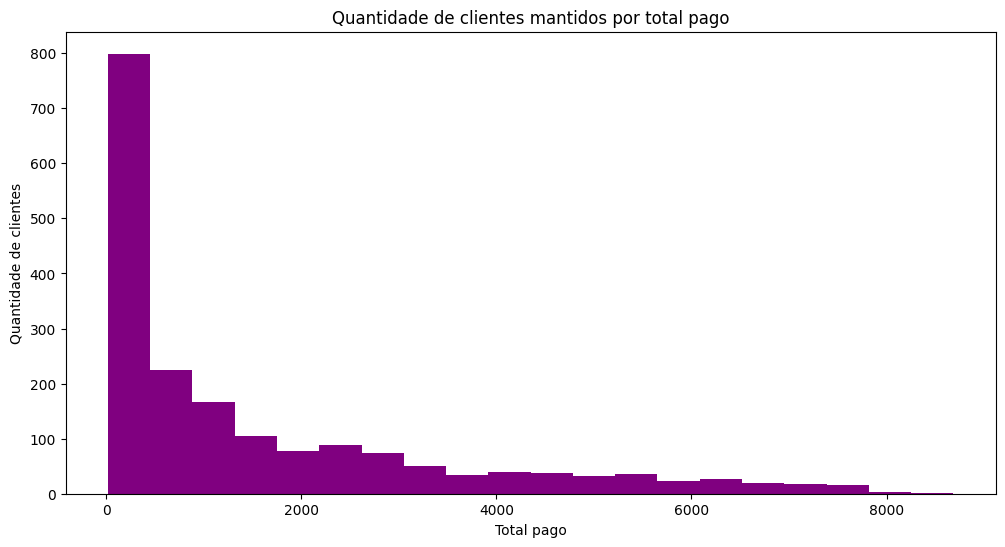

In [72]:
# Criando um gráfico de linhas para ver o tempo


import matplotlib.pyplot as plt

# Plotando o histograma e agrupando para facilitar a visão média
cancelamento_pago.plot(
    kind='hist',
    color='purple',
    bins=20,
    figsize=(12,6),
    title='Quantidade de clientes mantidos por total pago'
)

plt.xlabel('Total pago')
plt.ylabel('Quantidade de clientes')
plt.xticks(rotation=0)
plt.show()

# é notável que valor pago total abaixo de 2000 fazem com que clientes saiam mais, visto que já analisamos que quanto menor é o tempo de contrato do cliente maior a chance dele não ser mantido na empresa.


# 📄Relatorio Final

**Objetivo:**
Analisar o comportamento dos clientes para identificar padrões de evasão e gerar insights para retenção.

**Metodologia:**

Extração e Normalização dos Dados:

Os dados foram carregados a partir de um arquivo JSON hospedado no GitHub.

Utilizou-se Pandas para leitura e manipulação dos dados e json_normalize para transformar estruturas aninhadas do JSON em colunas planas.

Foram concatenadas as informações de diferentes seções do JSON (customer, phone, internet, account) em um único DataFrame.

O DataFrame final foi salvo em CSV para facilitar a análise.

**Limpeza e Tratamento:**

Conversão de strings para letras minúsculas para padronização.

Remoção de valores ausentes e ajuste de tipos de dados.

**Seleção das colunas relevantes para a análise:**

customerID

Churn (indicador de evasão)

tenure (tempo de permanência em meses)

Contract (tipo de contrato)

PhoneService (assinatura de serviço telefônico)

MultipleLines (assisnatura de mais de uma linha de telefone)

InternetService (assinatura de um provedor internet)

StreamingMovies (assinatura de streaming de filmes)

Charges.Monthly (valor mensal pago)

Charges.Total (total pago)

Lembrando que foram utilizadas outras colunas categoricas conforme foi solicitado pelo desafio como:

InternetService: assinatura de um provedor internet
OnlineSecurity: assinatura adicional de segurança online
OnlineBackup: assinatura adicional de backup online
DeviceProtection: assinatura adicional de proteção no dispositivo
TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
StreamingTV: assinatura de TV a cabo


**Ferramentas Utilizadas:**



Python (Pandas, Matplotlib) para ETL e visualizações.

Jupyter Notebook para execução e documentação do processo no google colab



**Tratamentos Realizados:**

Contagem e distribuição de valores nas colunas relevantes.

Conversão e normalização de dados vindos do JSON e transformando em arquivos csv

Geração de gráficos de histograma , barras e linha(para análise com tempo) para identificar padrões de permanência, valor pago , serviços utilizados e perfil dos clientes que cancelavam.



**Insights**:


Quanto ao valor pago:


Com a análise de médias, medianas e desvios padrão para gastos diários, mensais e totais, o custo mensal ligeiramente mais alto entre os que saíram pode indicar sensibilidade a preço, mas o baixo total gasto sugere que muitos cancelaram cedo, antes de gerar altos valores acumulados. Com os gráficos de valor total pago, para os clientes que mais saíram, o valor varia de 500 a 1000.

Distribuição de evasão:


Pela análise dos gráficos, pouco mais de 1/4 dos clientes apresentaram evasão, valor que já é considerável e merece atenção.

Contagem de evasão por variáveis categóricas:


Quanto ao gênero, não há muita diferença entre os que saíram e os que permaneceram. Clientes com contrato mensal tendem a cancelar mais, enquanto contratos de 1 ou 2 anos apresentam menor evasão. Entre os que ficam, a maioria ainda possui contrato mensal, mas de curta duração. O pagamento por cheque eletrônico parece contribuir para mais cancelamentos, possivelmente por dificuldades do sistema. Por fim, clientes que evadem geralmente não são idosos.

Quanto ao tipo de assinatura:


Cancelamentos são mais frequentes entre clientes que não possuem suporte técnico e segurança online, assim como entre os que têm serviços de telefone. Entre os que não cancelaram, aqueles com serviços de telefone são os que mais mantiveram a assinatura, o que também se aplica aos que não possuem múltiplas linhas telefônicas.

Quanto ao tempo:


A taxa de cancelamento é maior entre clientes com até 10 meses de contrato e diminui à medida que o tempo aumenta.


Conclusão:



Os dados indicam que a maior parte da evasão ocorre entre clientes com contratos mensais, de curto tempo de permanência, que pagam com cheque eletrônico e que não possuem suporte técnico ou segurança online adequada. Além disso, clientes sensíveis ao preço tendem a cancelar cedo, antes de gerar altos gastos acumulados.

Portanto, uma solução eficaz deve focar em reduzir a rotatividade de clientes de curto prazo e contratos mensais, oferecendo incentivos para permanência mais longa, melhorar a experiência de pagamento, principalmente no cheque eletrônico, e garantir suporte técnico e segurança online consistentes. Outras medidas poderiam incluir planos de fidelização ou descontos para contratos anuais, comunicação proativa para clientes em risco de evasão e monitoramento de gastos baixos, que podem indicar clientes propensos a cancelar cedo.